## Cleaning

In [4]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
df_raw = pd.read_csv('Data.csv.xls', sep = '\t')
data = df_raw

## Remove Null

In [6]:
data = data.dropna()

## Feature Engineering

### "Customer For"

In [7]:
#Amount of time as customer
#newest customer will be reference as last date since I do not have a dataset publication date 
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
d1 = max(dates) 
d = pd.to_datetime(data["Dt_Customer"])
data["Customer_For_"] = pd.to_datetime(d1) - pd.to_datetime(d)
data['Customer_For'] = pd.DataFrame(data['Customer_For_'].astype('timedelta64[D]'))

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10646/1885171151.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10646/1885171151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10646/1885171151.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

### Age

In [8]:
#I will be using 2015 to stay close to the datasets dates
data["Age"] = 2015 - data["Year_Birth"]

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10646/3084239419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = 2015 - data["Year_Birth"]


### Spent

In [9]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10646/3137231044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]


### Adults

In [7]:
data["Adults"]= data["Marital_Status"].replace({"Married":2, "Together":2, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1, "Single":1, "Alone":1})


/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10438/2425467926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Adults"]= data["Marital_Status"].replace({"Married":2, "Together":2, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1, "Single":1, "Alone":1})


### Children

In [8]:
data["Adults"]= data["Marital_Status"].replace({"Married":2, "Together":2, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1, "Single":1, "Alone":1})


/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10438/3542201561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Children"]=data["Kidhome"]+data["Teenhome"]


### Household Size

In [9]:
#Household
data["Household_Size"] = data["Adults"] + data["Children"]

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10438/4015938001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Household_Size"] = data["Adults"] + data["Children"]


### Education

In [10]:
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_10438/1389427484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


### Other Adjustments

In [11]:
#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
data = data.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", "Customer_For_"], axis = 1)

In [12]:
#Encode categotical variable
datacat = data.select_dtypes(exclude=["number"])
LE=LabelEncoder()
for i in datacat:
    data[i]=data[[i]].apply(LE.fit_transform)

## Outliers

In [21]:
#Gather numerial columns
datanum = data.select_dtypes(include=np.number)
datanum.head()
datanum.shape

def plot_boxplot(df, feature):
    print(feature)
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

Education


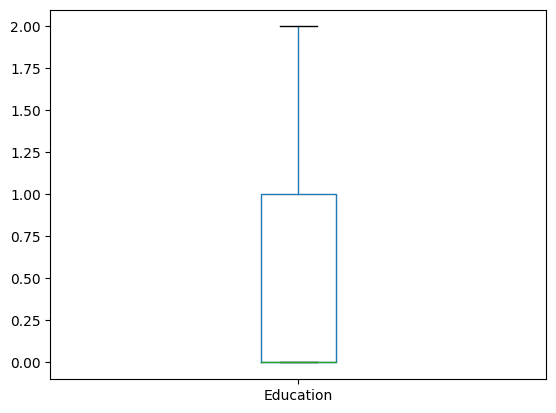

Income


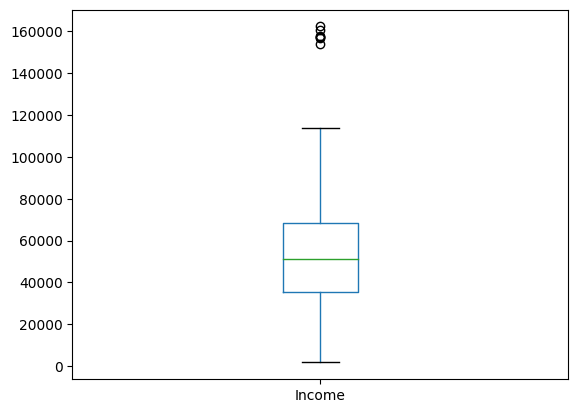

Kidhome


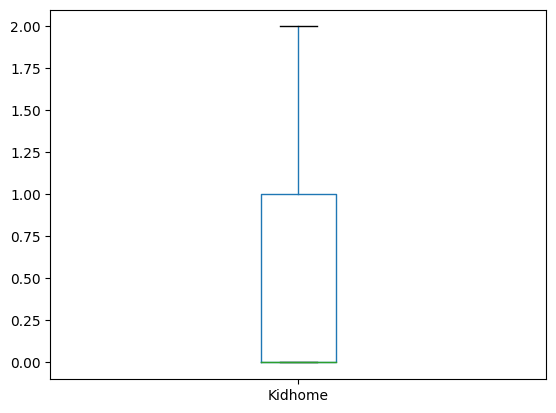

Teenhome


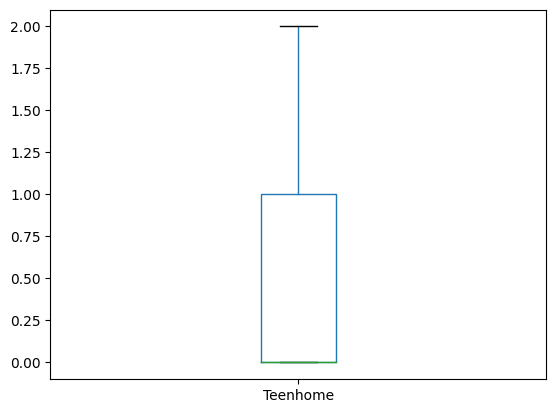

Recency


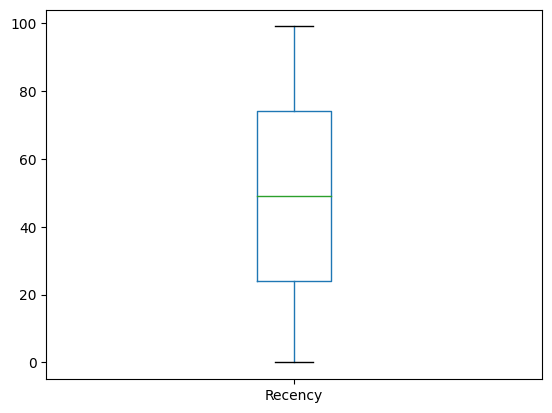

Wines


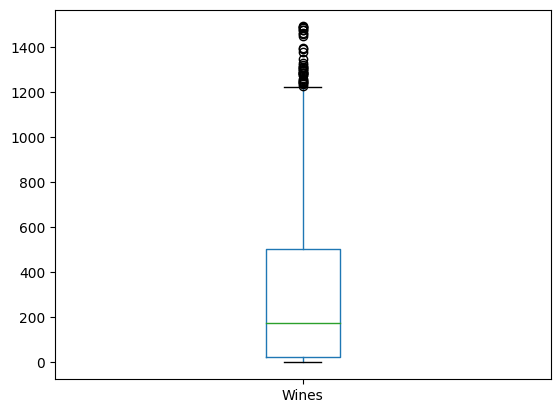

Fruits


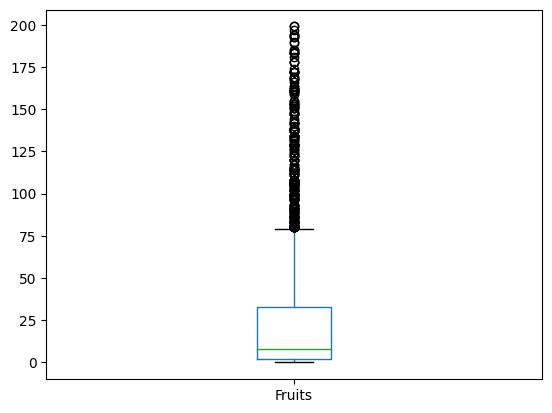

Meat


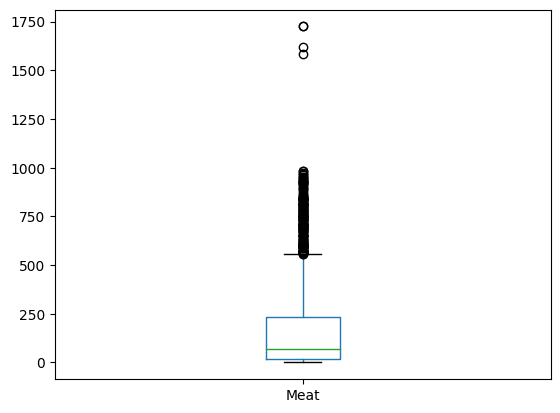

Fish


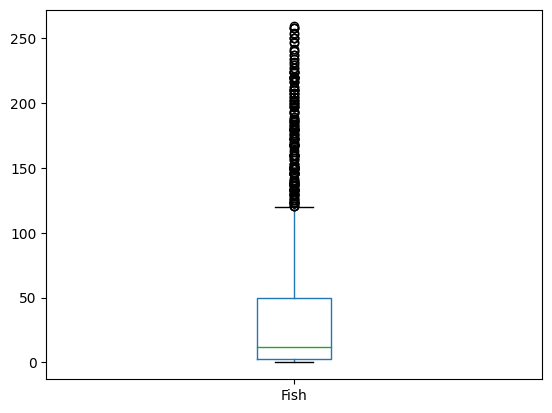

Sweets


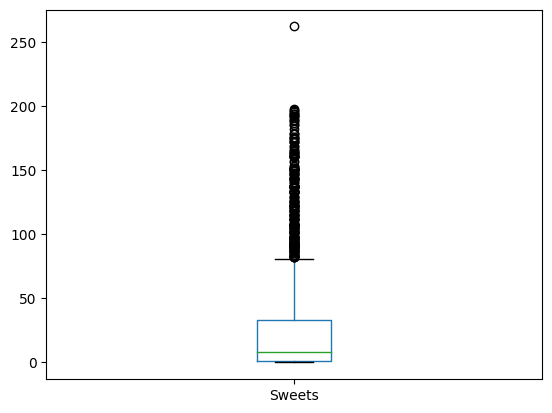

Gold


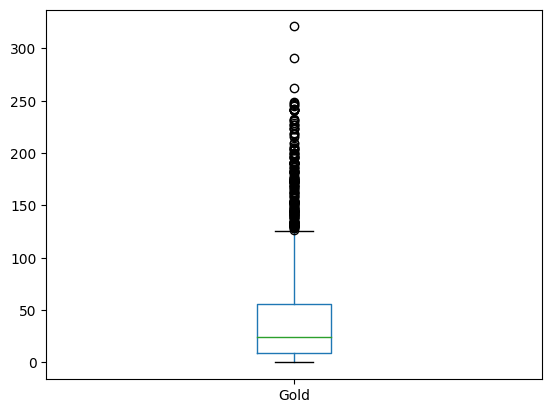

NumDealsPurchases


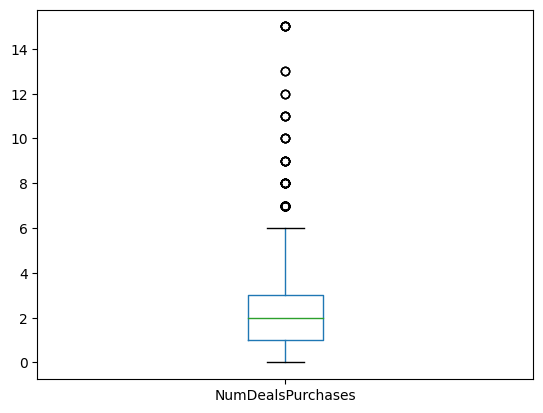

NumWebPurchases


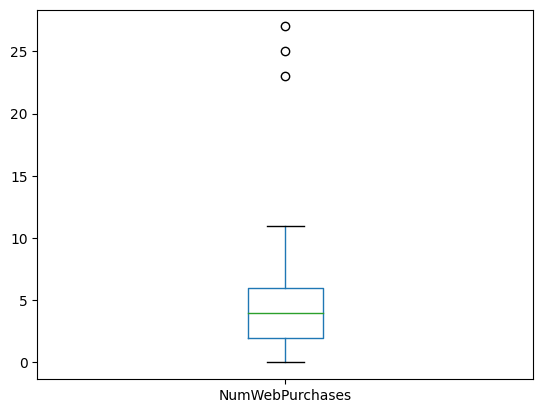

NumCatalogPurchases


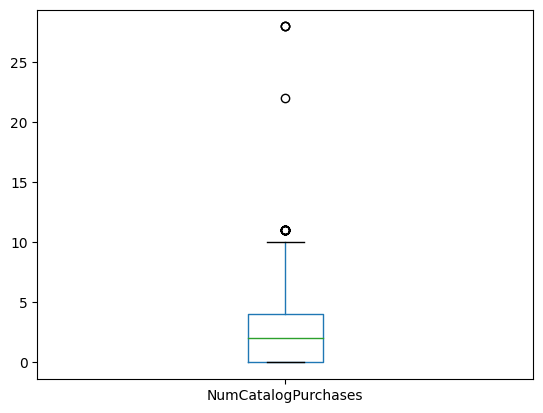

NumStorePurchases


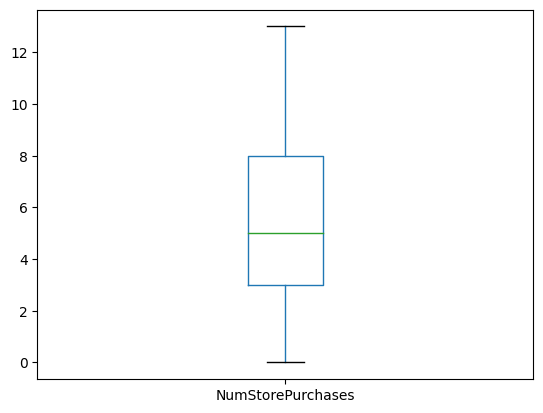

NumWebVisitsMonth


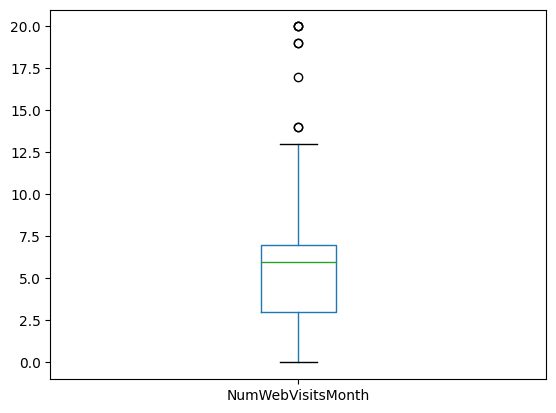

AcceptedCmp3


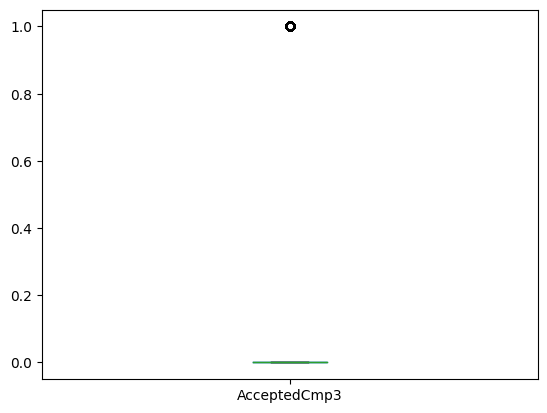

AcceptedCmp4


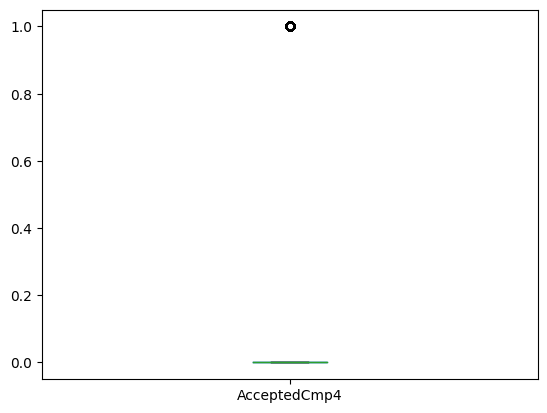

AcceptedCmp5


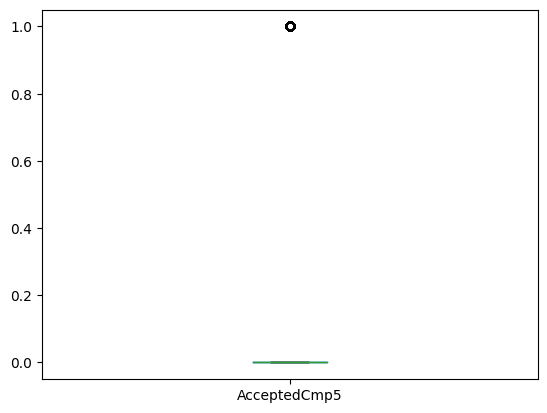

AcceptedCmp1


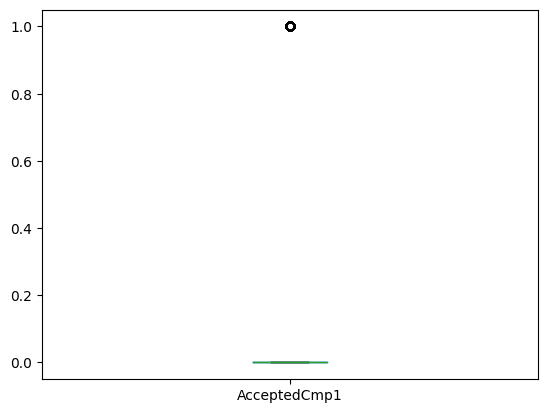

AcceptedCmp2


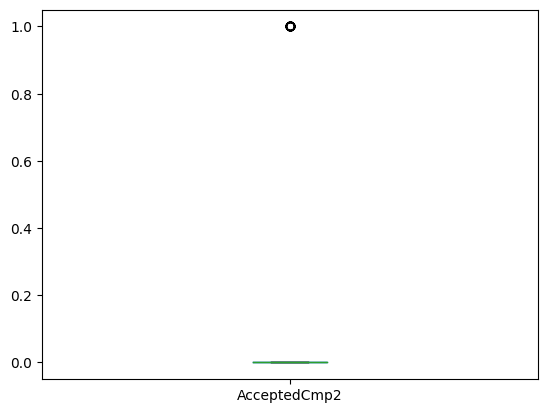

Complain


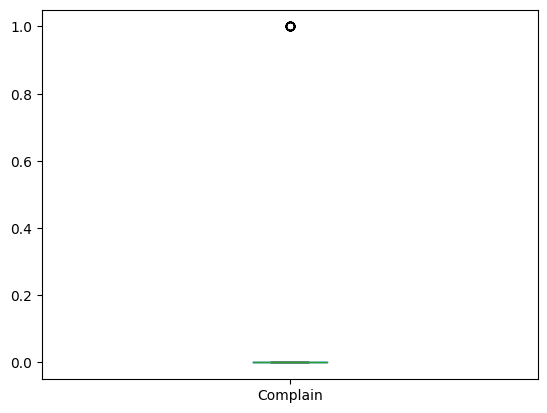

Response


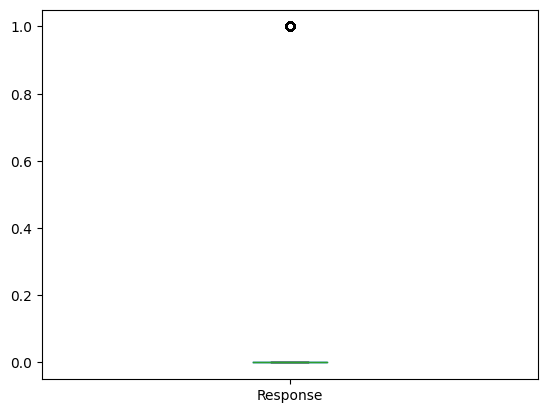

Customer_For


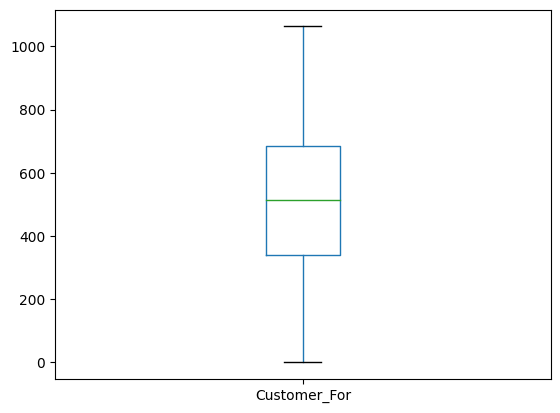

Age


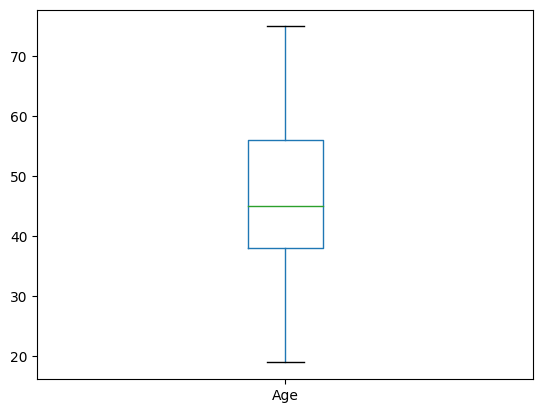

Spent


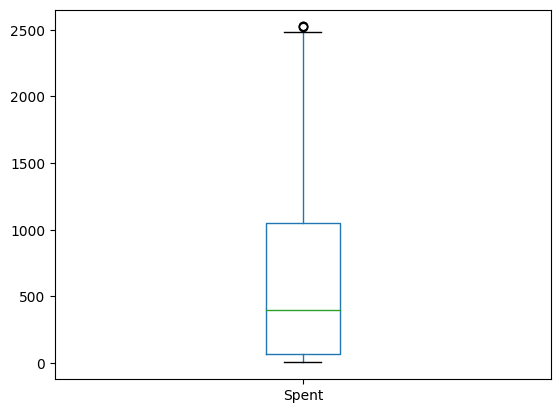

Adults


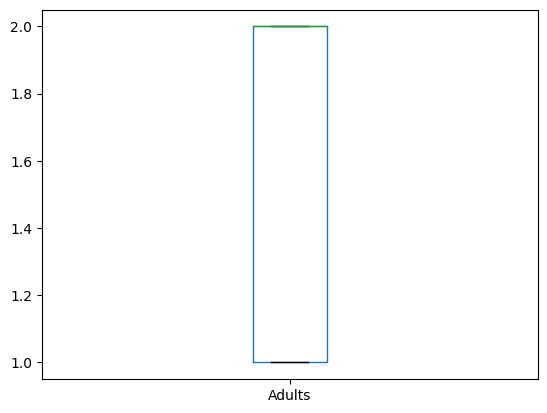

Children


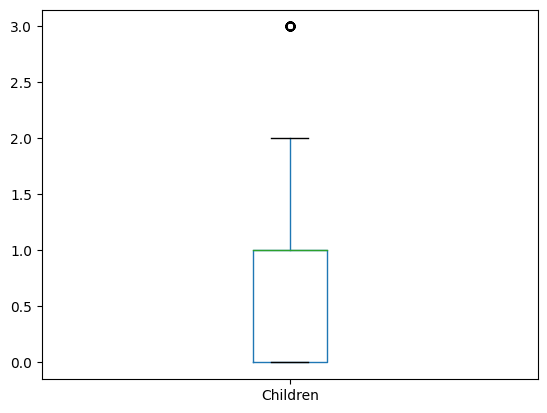

Household_Size


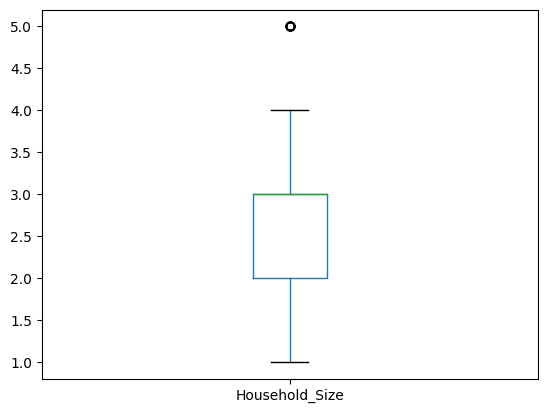

In [22]:
for feature in datanum:
    plot_boxplot(datanum, feature)

In [23]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    ls = df.index[ (df[ft] < lower) | (df[ft] > upper)]
    return ls

In [24]:
index_list = []
for feature in ['Income', 'Age']:
    index_list.extend(outliers(data, feature))

In [25]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [40]:
df_cleaned = remove(data, index_list)
df_cleaned

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Adults,Children,Household_Size
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,971.0,58,1617,1,0,1
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,125.0,61,27,1,2,3
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,472.0,50,776,2,0,2
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,65.0,31,53,2,1,3
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,321.0,34,422,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,541.0,48,1341,2,1,3
2236,1,64014.0,2,1,56,406,0,30,0,0,...,1,0,0,0,61.0,69,444,2,3,5
2237,0,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,315.0,34,1241,1,0,1
2238,1,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,316.0,59,843,2,1,3


In [13]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

## Scaling

In [14]:
df = data.copy()
df = df.drop( ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'], axis=1)

In [18]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

In [19]:
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Adults,Children,Household_Size
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070


## Check Coorelation

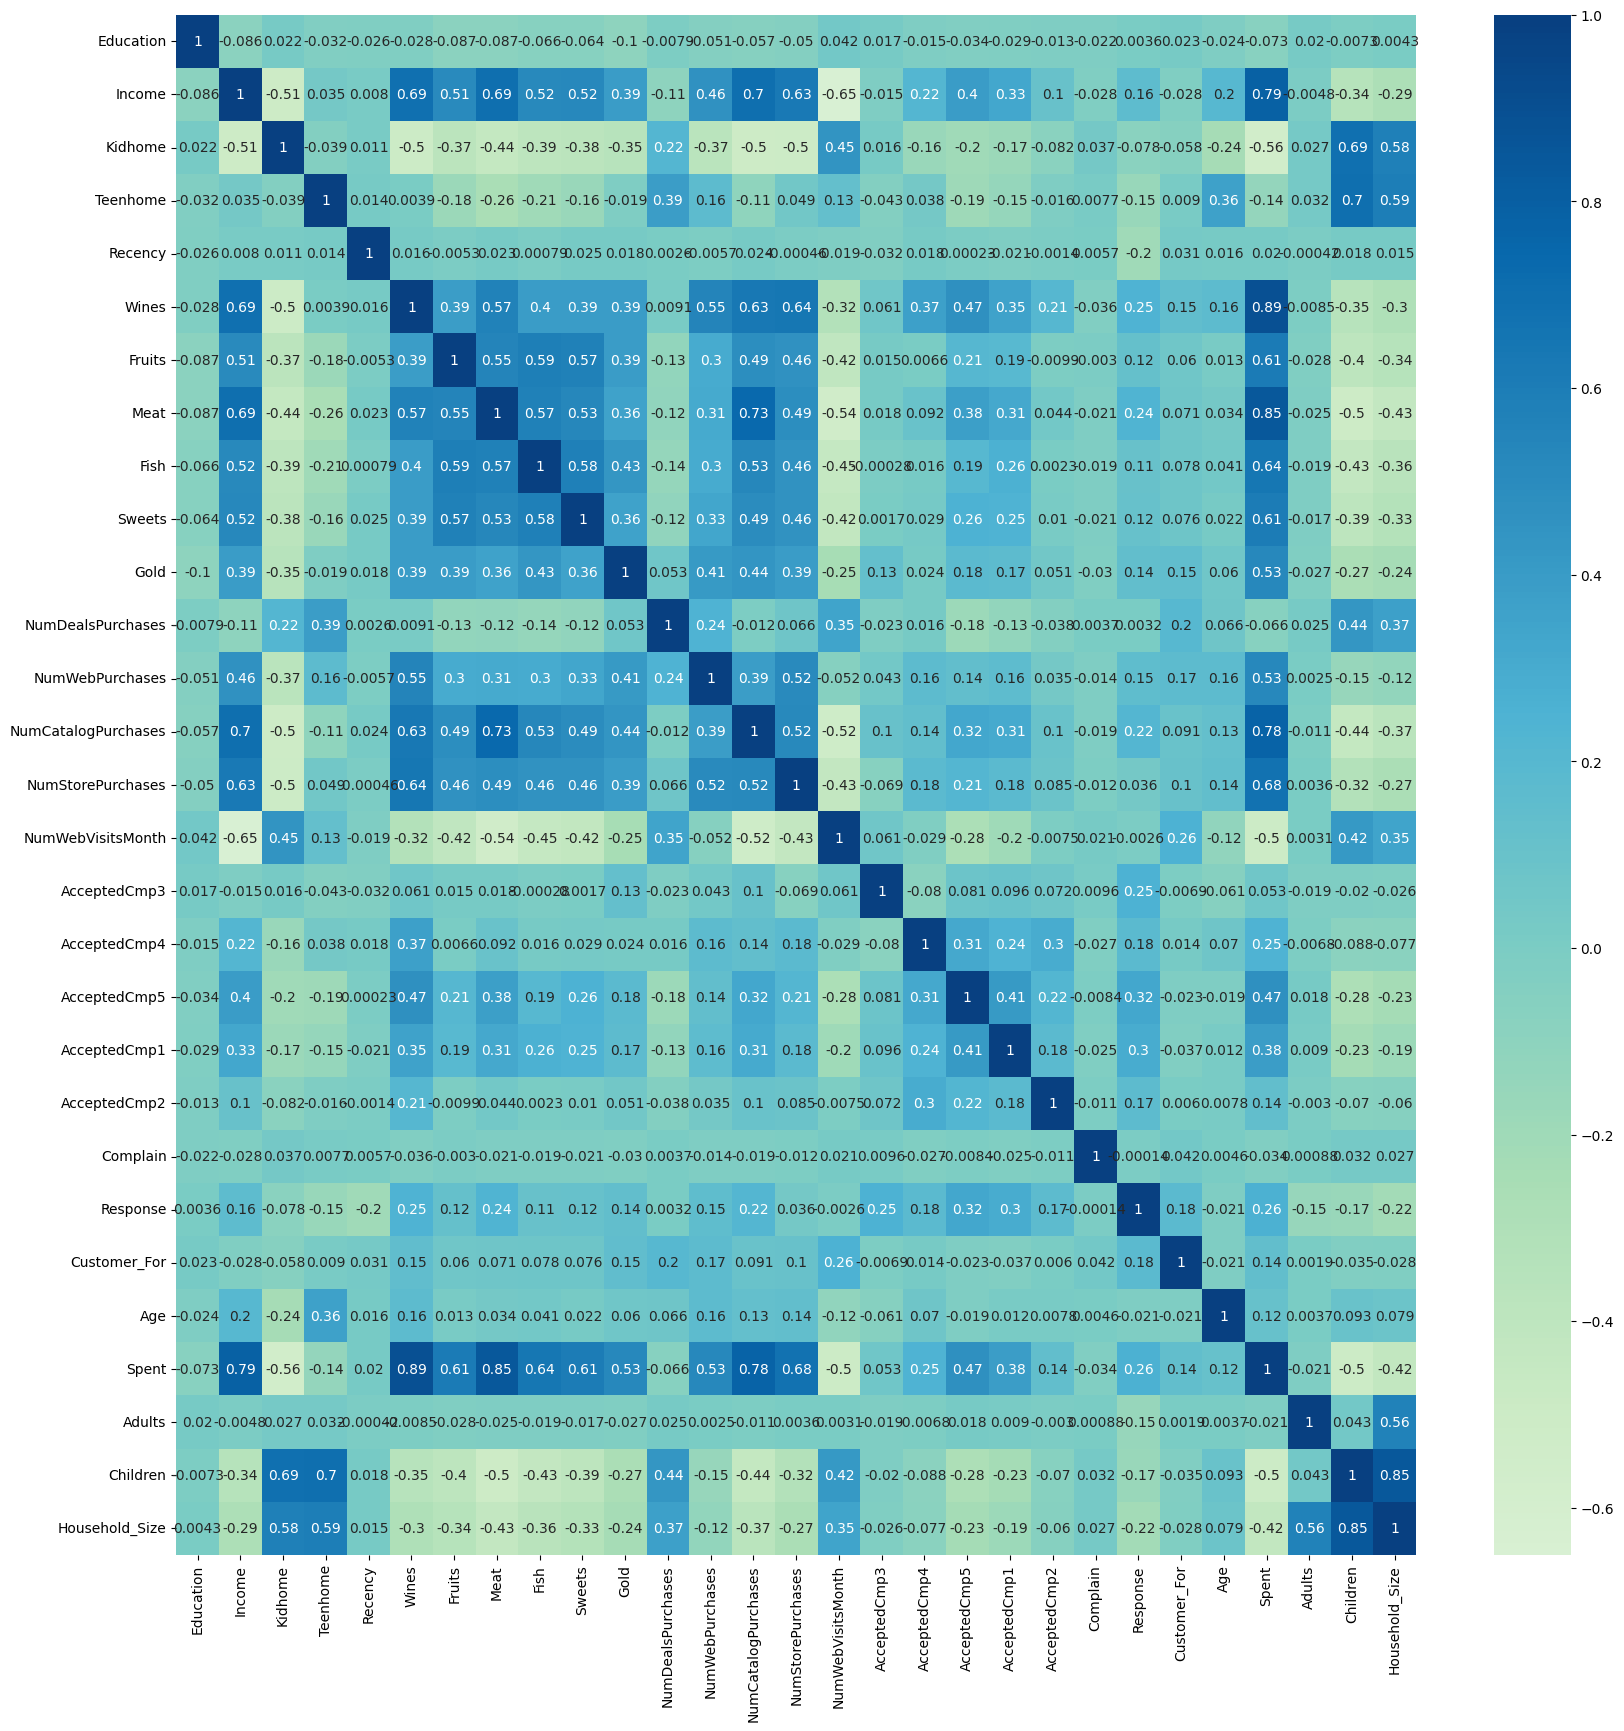

In [20]:
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True,cmap = 'GnBu', center=0)
plt.show()

## PCA

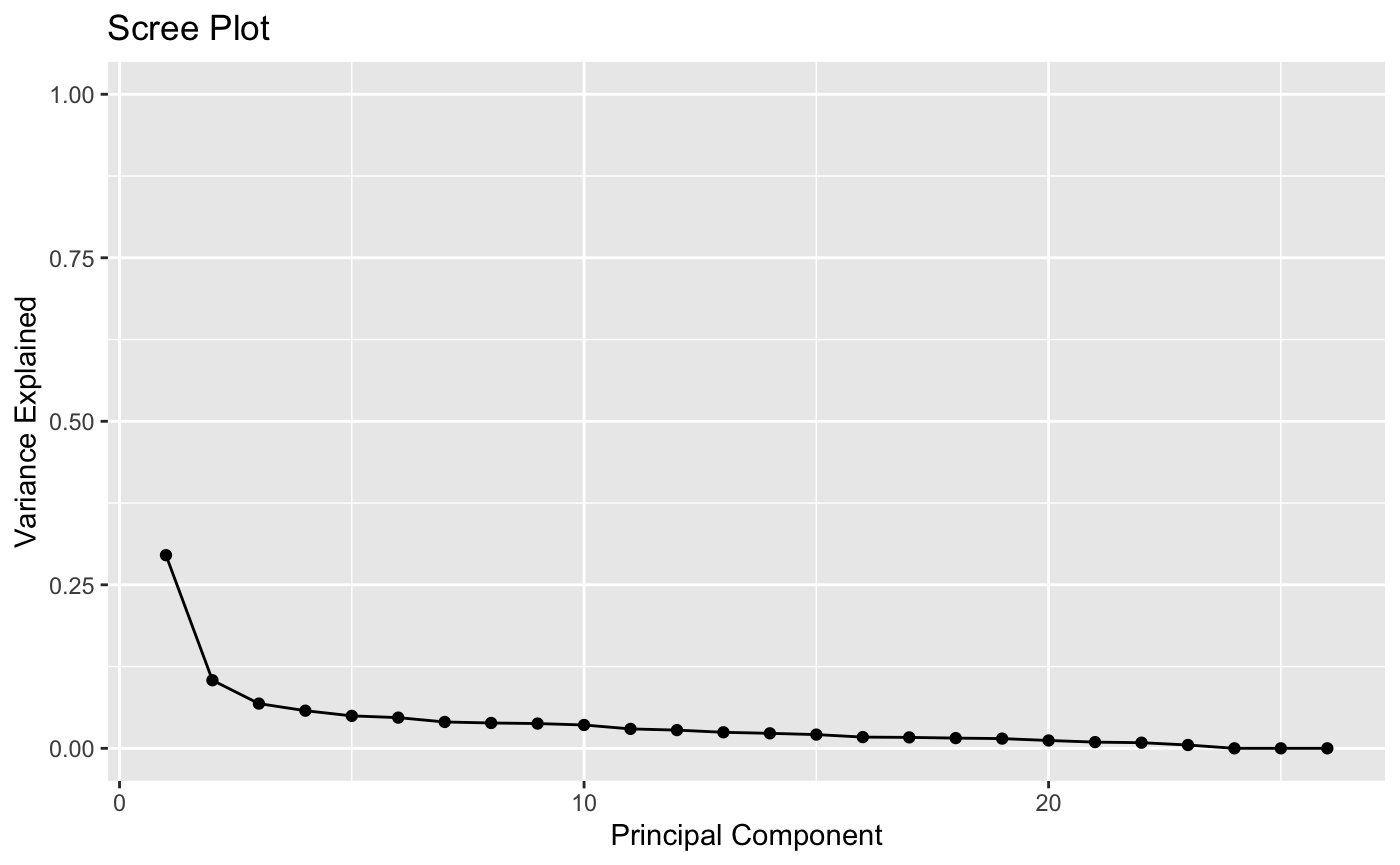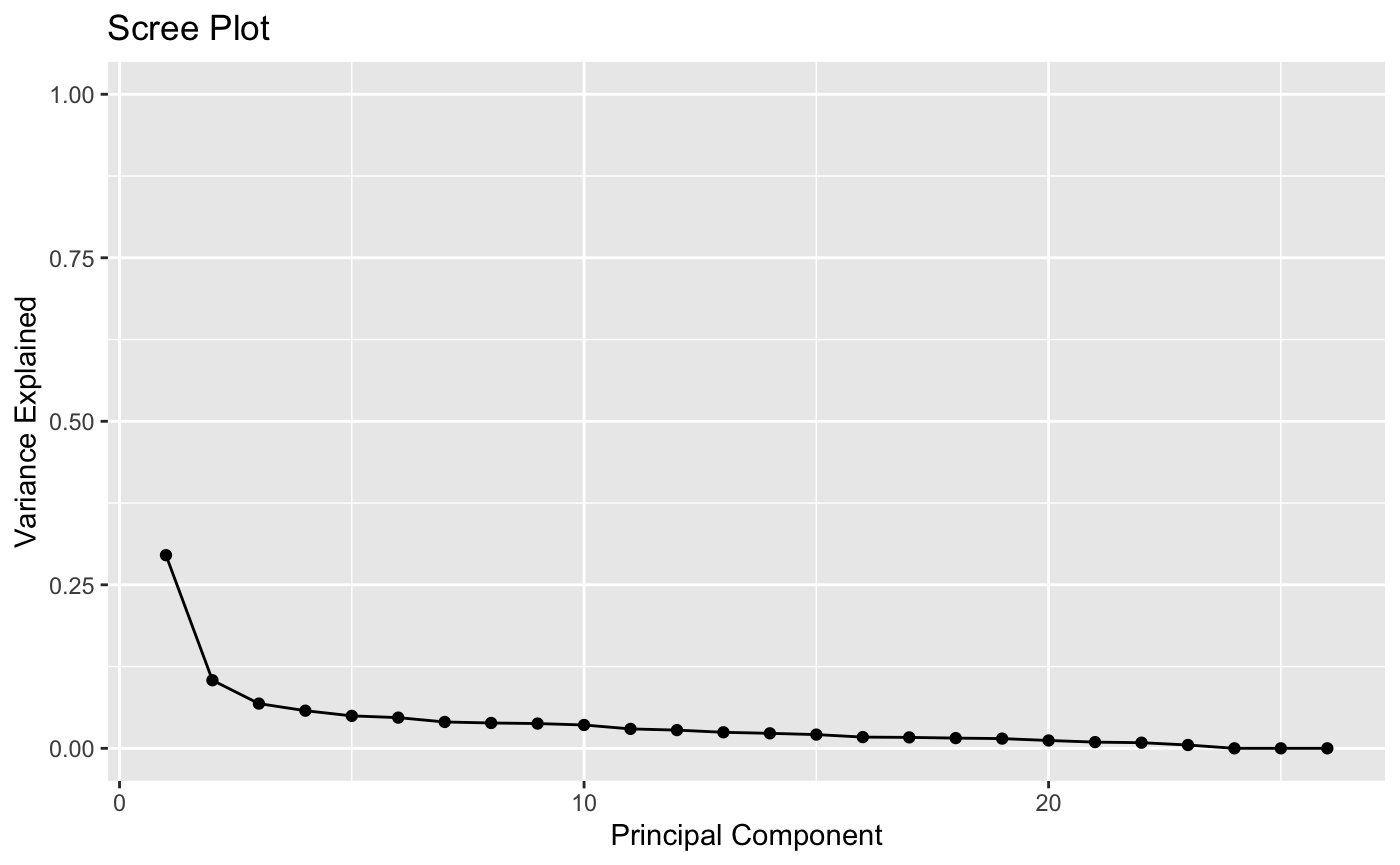

In [45]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
PC = pd.DataFrame(pca.transform(scaled_df),
               columns = ['PC1', 'PC2', 'PC3'])
PC.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2212.0,-1.027910e-16,2.799612,-5.894749,-2.497218,-0.735551,2.433541,7.289119
PC2,2212.0,1.284887e-17,1.632624,-3.873841,-1.309499,-0.170296,1.165704,6.329633
PC3,2212.0,3.533440e-17,1.221943,-3.531818,-0.826936,-0.023560,0.800150,6.627395


In [42]:
%store df_cleaned

Stored 'df_cleaned' (DataFrame)


In [46]:
%store PC

Stored 'PC' (DataFrame)
